In [38]:
!pip install opencv-python
!pip install tensorflow
!pip install imblearn

In [39]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### set the labels

In [40]:
emotions = ["angry","fear","happy","neutral","sad","surprise"]

#### path for training data

In [41]:
dataset_dir = "./train"

### visualizing the data

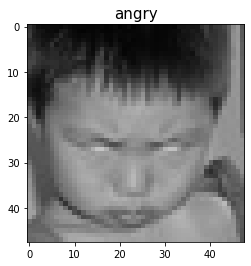

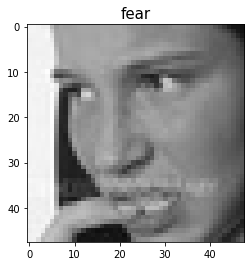

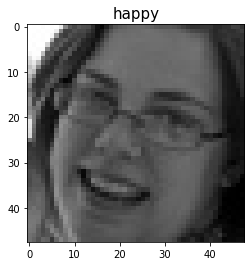

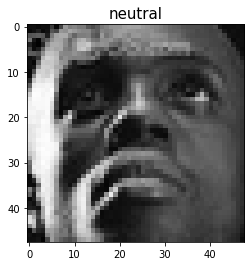

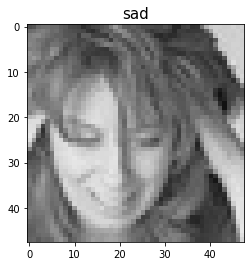

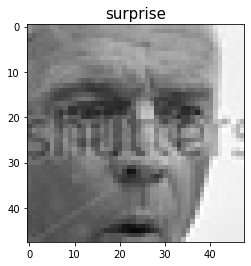

In [42]:
for emotion in emotions:
    path = os.path.join(dataset_dir,emotion)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img))
        plt.imshow(cv.cvtColor(img_array,cv.COLOR_BGR2RGB))
        plt.title(emotion, fontsize=15)
        plt.show()
        break        

## read through all the images and converting them to array

In [43]:
training_data = []

def create_training_data():
    for emotion in emotions:
        path = os.path.join(dataset_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            training_data.append([img_array,class_label])
            

In [44]:
create_training_data()

In [45]:
print(len(training_data))

28273


In [46]:
import random
random.shuffle(training_data)

### Creating the features and labels

In [47]:
X = [] ##feature
y = [] ##labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,48,48,3)

### Preprocessing

In [48]:
X.shape

(28273, 48, 48, 3)

In [49]:
X = X.astype(np.uint8)
X.dtype

dtype('uint8')

In [50]:
len(y)

28273

In [51]:
y = np.array(y)

In [52]:
y = y.astype(np.uint8)
y.dtype

dtype('uint8')

In [53]:
y[:5]

array([2, 2, 5, 3, 3], dtype=uint8)

In [54]:
X_rescaled = X/255
X_rescaled[:5]

array([[[[0.90980392, 0.90980392, 0.90980392],
         [0.92156863, 0.92156863, 0.92156863],
         [0.8745098 , 0.8745098 , 0.8745098 ],
         ...,
         [0.90588235, 0.90588235, 0.90588235],
         [0.90980392, 0.90980392, 0.90980392],
         [0.91372549, 0.91372549, 0.91372549]],

        [[0.90588235, 0.90588235, 0.90588235],
         [0.95294118, 0.95294118, 0.95294118],
         [0.55294118, 0.55294118, 0.55294118],
         ...,
         [0.89803922, 0.89803922, 0.89803922],
         [0.90588235, 0.90588235, 0.90588235],
         [0.90196078, 0.90196078, 0.90196078]],

        [[0.94117647, 0.94117647, 0.94117647],
         [0.76862745, 0.76862745, 0.76862745],
         [0.2627451 , 0.2627451 , 0.2627451 ],
         ...,
         [0.90980392, 0.90980392, 0.90980392],
         [0.91372549, 0.91372549, 0.91372549],
         [0.90588235, 0.90588235, 0.90588235]],

        ...,

        [[0.92156863, 0.92156863, 0.92156863],
         [0.91764706, 0.91764706, 0.91764706]

## Model Creation and Training

In [72]:
from tensorflow import keras

In [56]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same',input_shape=(48, 48,3)),
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(128, (5,5),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (5,5),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(X_rescaled,y,epochs=50)

Epoch 1/50
884/884 [==============================] - 10s 11ms/step - loss: 1.6590 - accuracy: 0.3113
Epoch 2/50
884/884 [==============================] - 10s 11ms/step - loss: 1.3434 - accuracy: 0.4723
Epoch 3/50
884/884 [==============================] - 10s 11ms/step - loss: 1.2178 - accuracy: 0.5254
Epoch 4/50
884/884 [==============================] - 9s 11ms/step - loss: 1.1468 - accuracy: 0.5553
Epoch 5/50
884/884 [==============================] - 9s 11ms/step - loss: 1.0879 - accuracy: 0.5794
Epoch 6/50
884/884 [==============================] - 9s 11ms/step - loss: 1.0346 - accuracy: 0.6008
Epoch 7/50
884/884 [==============================] - 9s 11ms/step - loss: 0.9953 - accuracy: 0.6176
Epoch 8/50
884/884 [==============================] - 9s 11ms/step - loss: 0.9512 - accuracy: 0.6373
Epoch 9/50
884/884 [==============================] - 9s 11ms/step - loss: 0.9108 - accuracy: 0.6530
Epoch 10/50
884/884 [==============================] - 9s 11ms/step - loss: 0.8711 - acc

## Creating Test Dataset

In [57]:
dataset_test_dir = "./test"

In [58]:
test_data = []

def create_test_data():
    for emotion in emotions:
        path = os.path.join(dataset_test_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            test_data.append([img_array,class_label])

In [59]:
create_test_data()

In [60]:
print(len(test_data))

7067


In [61]:
random.shuffle(test_data)

In [62]:
X_test = [] ##feature
y_test = [] ##labels

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1,48,48,3)

X_test = X_test.astype(np.uint8)
X_test.dtype

dtype('uint8')

In [63]:
y_test = np.array(y_test)
y_test = y_test.astype(np.uint8)
y_test.dtype

dtype('uint8')

In [64]:
X_test_rescaled = X_test/255
X_test_rescaled[:5]

array([[[[0.19607843, 0.19607843, 0.19607843],
         [0.20392157, 0.20392157, 0.20392157],
         [0.20392157, 0.20392157, 0.20392157],
         ...,
         [0.60784314, 0.60784314, 0.60784314],
         [0.58431373, 0.58431373, 0.58431373],
         [0.57254902, 0.57254902, 0.57254902]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.20784314, 0.20784314, 0.20784314],
         [0.21176471, 0.21176471, 0.21176471],
         ...,
         [0.55686275, 0.55686275, 0.55686275],
         [0.58431373, 0.58431373, 0.58431373],
         [0.57254902, 0.57254902, 0.57254902]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.21176471, 0.21176471, 0.21176471],
         [0.21960784, 0.21960784, 0.21960784],
         ...,
         [0.47058824, 0.47058824, 0.47058824],
         [0.59607843, 0.59607843, 0.59607843],
         [0.57647059, 0.57647059, 0.57647059]],

        ...,

        [[0.21960784, 0.21960784, 0.21960784],
         [0.22352941, 0.22352941, 0.22352941]

In [65]:
y_test[:10]

array([3, 2, 1, 4, 2, 5, 4, 4, 2, 4], dtype=uint8)

In [66]:
y_pred = model.predict(X_test_rescaled)

In [67]:
y_pred_final= []
for i in range(len(y_pred)):
    y_pred_final.append(np.argmax(y_pred[i]))

In [68]:
y_pred_final[:10]

[3, 2, 1, 4, 5, 0, 4, 4, 2, 4]

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [70]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       958
           1       0.55      0.42      0.48      1024
           2       0.81      0.81      0.81      1774
           3       0.54      0.59      0.56      1233
           4       0.47      0.53      0.50      1247
           5       0.78      0.75      0.77       831

    accuracy                           0.62      7067
   macro avg       0.61      0.61      0.61      7067
weighted avg       0.62      0.62      0.62      7067



Text(69.0, 0.5, 'Truth')

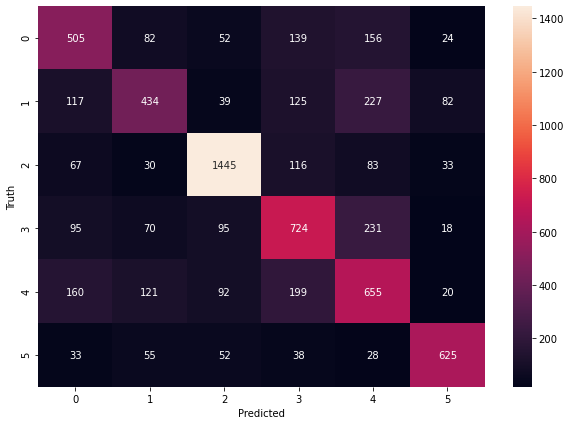

In [71]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_final)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')